In [1]:
# Libraries
import numpy as np
from model import *
import matplotlib.pyplot as plt

In [2]:
# Parameters
L = 10*np.pi
N = 101
nu = 0.85546875
mesh = np.linspace(0., L, N, endpoint = False) 
u0 = np.random.randn(N)
t0 = 0.
dt = 1e-1

In [3]:
# Instanciate a one-dimensional KSE solver
kse = KSE_1D(L, N, nu, u0, t0, dt)

In [4]:
# Forward the system
traj = kse.forward(n_steps = 20000, keep_traj = True)

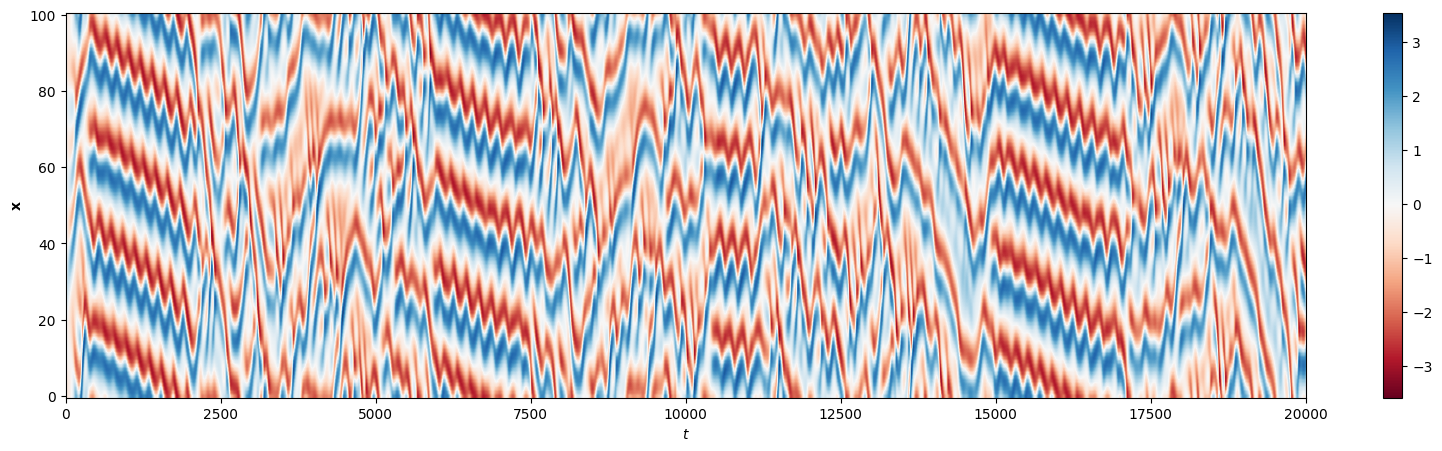

In [5]:
# Plot of the trajectory
plt.figure(figsize=(20, 5))
plt.imshow(traj.T, cmap = "RdBu", aspect = "auto", origin = "lower")
plt.colorbar()
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbf{x}$')
plt.show()

In [6]:
# Computation of LCE
LCE, history = kse.LCE(N, 0, 10**4, True)

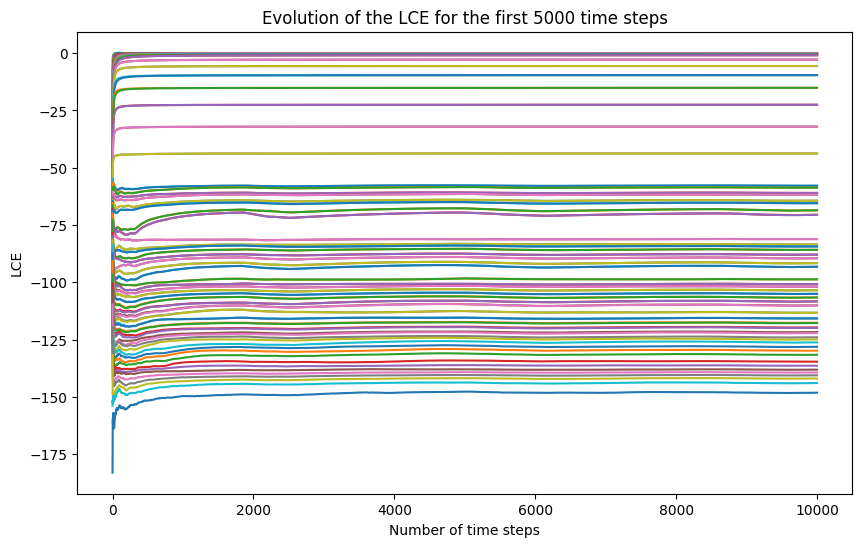

In [7]:
# Plot of LCE
plt.figure(figsize = (10,6))
plt.plot(history)
plt.xlabel("Number of time steps")
plt.ylabel("LCE")
plt.title("Evolution of the LCE for the first 5000 time steps")
plt.show()

In [8]:
# Number of positive exponents
n_pos = int(np.sum(LCE > 0.))
n_neg = N - n_pos
print("Number of positive exponents: {}".format(n_pos))
print("Number of negative exponents: {}".format(n_neg))

Number of positive exponents: 3
Number of negative exponents: 98


In [9]:
# Compute CLVs
CLVs, traj = kse.CLV(N, 0, 10**4, 10**3, 10**4, True)